## Basic linear fit wx+b = z using TENSORFLOW

w - variable
b - variable
x - placeholder (data)
wx - matrix multiplication
wx+b addition 
--> pass thruough activation function to generate z

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
np.random.seed(101)
tf.random.set_seed(101)

In [4]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [6]:
rand_b = np.random.uniform(0,100,(5,1))

In [10]:
tf.compat.v1.disable_eager_execution()

In [11]:
a = tf.compat.v1.placeholder(tf.float32)

In [12]:
b = tf.compat.v1.placeholder(tf.float32)

In [13]:
add_op = a + b

In [14]:
mul_op = a * b

In [19]:
with tf.compat.v1.Session() as sess:
    
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    
    mult_result = sess.run(mul_op, feed_dict = {a:rand_a,b:rand_b})
    print(mult_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]
[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


## EXAMPLE NEURAL NETWORK

In [22]:
n_features = 10
n_dense_neurons = 3

In [40]:
x = tf.compat.v1.placeholder(tf.float32,(n_features,None))

In [41]:
W = tf.Variable(tf.random.normal([n_dense_neurons,n_features]))

In [42]:
b = tf.Variable(tf.ones([n_dense_neurons,1]))

In [43]:
Wx = tf.matmul(W,x)
z = tf.add(Wx,b)

In [44]:
a = tf.sigmoid(z)

In [46]:
init = tf.compat.v1.global_variables_initializer()

In [48]:
with tf.compat.v1.Session() as sess:
    
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict = {x: np.random.random([n_features,1])})

In [49]:
print(layer_out)

[[0.9661018 ]
 [0.97217107]
 [0.2665458 ]]


## SIMPLE REGRESSION EXAMPLE

In [52]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([-0.17289561,  2.24387308,  3.57001461,  3.26783558,  4.32780247,
        5.96742265,  6.14049066,  6.63051206,  7.54219188, 10.41297596])

In [53]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

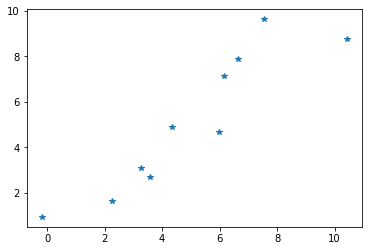

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_data,y_label,'*')

y = mx + b

In [68]:
rand_vals = np.random.rand(2) # initialize the parameters randomly, the network will then calculate these

In [60]:
m = tf.Variable(rand_vals[0])
b = tf.Variable(rand_vals[1])

In [61]:
error = 0

for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    
    error += (y-y_hat)**2


In [66]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [67]:
init = tf.compat.v1.global_variables_initializer()

In [71]:
with tf.compat.v1.Session() as sess:
    
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        
        sess.run(train)
    
    final_slope, final_intercept = sess.run([m,b])

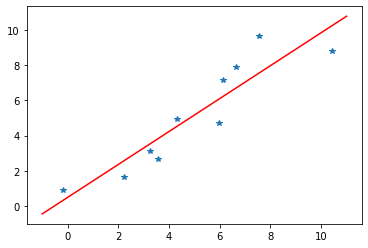

In [72]:
x_test = np.linspace(-1,11,10)

y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')

## TENSOR FLOW REGRESSION 

In [73]:
import pandas as pd

In [74]:
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data))

y = mx+b

b = 5

In [75]:
y_true = (.5 * x_data) + 5 + noise 

In [76]:
x_df = pd.DataFrame(data=x_data, columns = ['X Data'])
y_df = pd.DataFrame(data=y_true, columns = ['Y'])

my_data = pd.concat([x_df,y_df],axis = 1)

In [77]:
my_data.head()

,X Data,Y
0,0.00000,3.994813
1,0.00001,4.258215
2,0.00002,5.187135
3,0.00003,4.267170
4,0.00004,3.617100


<AxesSubplot:xlabel='X Data', ylabel='Y'>

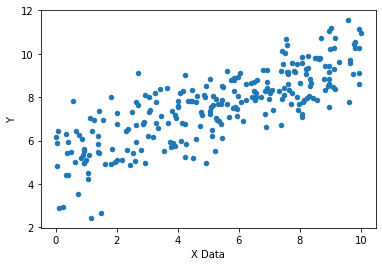

In [78]:
# plot a subsample
my_data.sample(n=250).plot(kind='scatter',x='X Data', y = 'Y')

In [79]:
# feed batches of data
batch_size = 8

In [87]:
rand_vals = np.random.rand(2) # initialize randomly
m = tf.Variable(rand_vals[0],dtype=tf.float32)
b = tf.Variable(rand_vals[1],dtype=tf.float32)

In [88]:
xph = tf.compat.v1.placeholder(tf.float32,[batch_size])

In [89]:
yph = tf.compat.v1.placeholder(tf.float32,[batch_size])

In [90]:
y_model = m*xph + b

In [91]:
error = tf.reduce_sum(tf.square(yph-y_model)) #loss funciton

In [92]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [93]:
init = tf.compat.v1.global_variables_initializer()

In [96]:
with tf.compat.v1.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph : y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
    
    model_m, model_b = sess.run([m,b])

In [97]:
model_m

0.5297683

In [100]:
model_b

4.9137955

In [101]:
y_hat = x_data*model_m+model_b

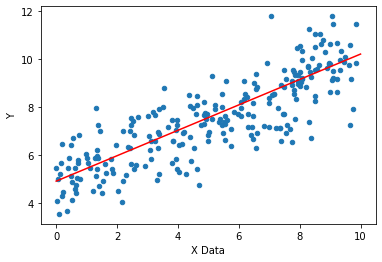

In [103]:
my_data.sample(n=250).plot(kind='scatter',x='X Data', y = 'Y')
plt.plot(x_data,y_hat,'r')

In [104]:
## ESTIMATOR API
# define list of features
# create the estimator model 
# create a data input function
# call train, evaluate and test

In [105]:
feat_cols = [tf.feature_column.numeric_column('x',shape = [1])]

In [106]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/tk/n3k58pnd31x8x6f8yp8dgllr0000gn/T/tmpebu382uf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [107]:
from sklearn.model_selection import train_test_splitain_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(
...     x_data, y_true, test_size=0.3, random_state=101)

In [111]:
input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x' : X_train},
                                                          y_train,batch_size=8,num_epochs=None,shuffle=True)

In [112]:
train_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x' : X_train},
                                                          y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [113]:
eval_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x' : X_test},
                                                          y_test,batch_size=8,num_epochs=1000,shuffle=False)

In [116]:
estimator.train(input_fn=input_func,steps = 1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.


/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/tk/n3k58pnd31x8x6f8yp8dgllr0000gn/T/tmpebu382uf/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 59.545925, step = 0
INFO:tensorflow:global_step/sec: 1288.66
INFO:tensorflow:loss = 2.135535, step = 100 (0.095 sec)
INFO:tensorflow:global_step/sec: 1419.26
INFO:tensorflow:loss = 2.5003388, step = 200 (0.053 sec)
INFO:tensorflow:global_step/sec: 1721.98
INFO:tensorflow:loss = 2.0111098, step = 300 (0.0

In [120]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-06-02T08:17:57Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/tk/n3k58pnd31x8x6f8yp8dgllr0000gn/T/tmpebu382uf/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Inference Time : 0.59245s
INFO:tensorflow:Finished evaluation at 2021-06-02-08:17:57
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0607953, global_step = 1000, label/mean = 7.4784026, loss = 1.0607953, predicti

In [118]:
eval_metrics = estimator.evaluate(input_fn = eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-06-02T08:17:22Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/tk/n3k58pnd31x8x6f8yp8dgllr0000gn/T/tmpebu382uf/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Inference Time : 0.61159s
INFO:tensorflow:Finished evaluation at 2021-06-02-08:17:23
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.091344, global_step = 1000, label/mean = 7.477245, loss = 1.091344, prediction/mean = 7.3789487
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/tk/n3k58pnd31x8x6f8yp8dgllr0000gn/T/tmpebu382uf/model.ckpt-1000


In [121]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'average_loss': 1.0607953, 'label/mean': 7.4784026, 'loss': 1.0607953, 'prediction/mean': 7.400312, 'global_step': 1000}


In [123]:
print('EVAL METRICS')
print(eval_metrics)

EVAL METRICS
{'average_loss': 1.091344, 'label/mean': 7.477245, 'loss': 1.091344, 'prediction/mean': 7.3789487, 'global_step': 1000}


In [124]:
brand_new_data = np.linspace(0,10,10)
input_fn_predict = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [126]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/tk/n3k58pnd31x8x6f8yp8dgllr0000gn/T/tmpebu382uf/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


[{'predictions': array([4.44233], dtype=float32)},
 {'predictions': array([5.0993643], dtype=float32)},
 {'predictions': array([5.756398], dtype=float32)},
 {'predictions': array([6.413432], dtype=float32)},
 {'predictions': array([7.0704665], dtype=float32)},
 {'predictions': array([7.7275004], dtype=float32)},
 {'predictions': array([8.384535], dtype=float32)},
 {'predictions': array([9.041569], dtype=float32)},
 {'predictions': array([9.698603], dtype=float32)},
 {'predictions': array([10.355637], dtype=float32)}]

In [128]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
             predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/tk/n3k58pnd31x8x6f8yp8dgllr0000gn/T/tmpebu382uf/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


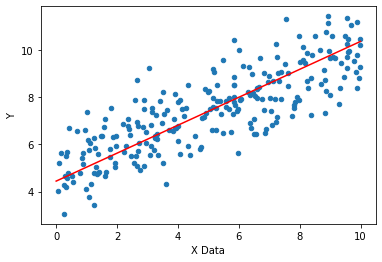

In [130]:
my_data.sample(n=250).plot(kind='scatter',x = 'X Data', y = 'Y')
plt.plot(brand_new_data,predictions,'r')

In [132]:
%config Completer.use_jedi = False #this command helps with autocomplete lags 

## CLASSIFICATION EXAMPLE

In [144]:
cd /Users/andreabocincova/Desktop/Courses/Tensorflow-Bootcamp-master 2/02-TensorFlow-Basics

/Users/andreabocincova/Desktop/Courses/Tensorflow-Bootcamp-master 2/02-TensorFlow-Basics


In [146]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [147]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [149]:
# normalize data
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [150]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree',]

In [151]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: ((x-x.min())/(x.max()-x.min())))

In [152]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [153]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [154]:
# dealing with categorical values
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [155]:
# if groupings are numerous or diverse (tensor flow will deal with this automatically)
#assigned_group = tf.feature_column.categorical_column_with_has_bucket('Group',hash_bucket_size = 10)

<AxesSubplot:>

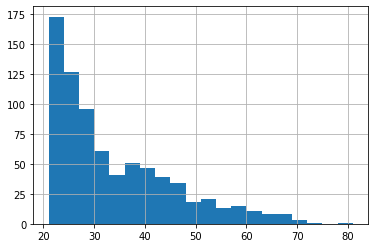

In [156]:
# convert a continuous to categorical 
diabetes['Age'].hist(bins=20)

In [158]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries = [20,30,40,50,60,70,80])

In [159]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [162]:
# train test split
x_data = diabetes.drop('Class',axis=1)
labels = diabetes['Class']

X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [163]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x = X_train,
                                                           y = y_train, batch_size = 10, num_epochs= 1000,shuffle = True)

In [165]:
model = tf.compat.v1.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/tk/n3k58pnd31x8x6f8yp8dgllr0000gn/T/tmp3k1hlcla', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [166]:
model.train(input_fn=input_func,steps = 1000)

INFO:tensorflow:Calling model_fn.


/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/tk/n3k58pnd31x8x6f8yp8dgllr0000gn/T/tmp3k1hlcla/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 6.931472, step = 0
INFO:tensorflow:global_step/sec: 376.436
INFO:tensorflow:loss = 3.3767223, step = 100 (0.266 sec)
INFO:tensorflow:global_step/sec: 640.3
INFO:tensorflow:loss = 4.901561, step = 200 (0.156 sec)
INFO:tensorflow:global_step/sec: 647.635
INFO:tensorflow:loss = 4.845863, step = 300 (0.154 sec)
INFO:tensorflow:global_step/sec: 583.423
INFO:tensorflow:loss = 4.5433774, step = 400 (0.171 sec)
INFO:tensorflow:global_step/sec: 657.307
INFO:tensorflow:loss = 4.7659893, step = 500 (0.153 sec)
I

In [167]:
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [169]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.


/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Instructions for updating:
The value of AUC returned by this may race with the update so this is deprecated. Please use tf.keras.metrics.AUC instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-06-02T08:52:33Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/tk/n3k58pnd31x8x6f8yp8dgllr0000gn/T/tmp3k1hlcla/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.59484s
INFO:tensorflow:Finished evaluation at 2021-06-02-08:52:33
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64935064, auc = 0.80127573, auc_precision_recall = 0.6440497, average_loss = 0.5261173, global_step = 1000, label/mean = 0.35064936, loss = 5.063879, precision = 0.6666667, prediction/mean = 0.3615246, recall = 0.54320985
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/tk/n3k58pn

In [170]:
results

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80127573,
 'auc_precision_recall': 0.6440497,
 'average_loss': 0.5261173,
 'label/mean': 0.35064936,
 'loss': 5.063879,
 'precision': 0.6666667,
 'prediction/mean': 0.3615246,
 'recall': 0.54320985,
 'global_step': 1000}

In [171]:
pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs = 1,shuffle=False)

In [172]:
predictions = model.predict(pred_input_func)

In [173]:
my_predictions = list(predictions)

INFO:tensorflow:Calling model_fn.


/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/tk/n3k58pnd31x8x6f8yp8dgllr0000gn/T/tmp3k1hlcla/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [175]:
my_predictions

[{'logits': array([0.068887], dtype=float32),
  'logistic': array([0.51721495], dtype=float32),
  'probabilities': array([0.48278508, 0.51721495], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.54087734], dtype=float32),
  'logistic': array([0.6320165], dtype=float32),
  'probabilities': array([0.3679835, 0.6320165], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.5853858], dtype=float32),
  'logistic': array([0.35769427], dtype=float32),
  'probabilities': array([0.64230573, 0.35769427], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'

In [183]:
# DNN MODEL

In [177]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [180]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [181]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs= 1000,shuffle=True)

In [182]:
dnn_model = tf.compat.v1.estimator.DNNClassifier(hidden_units = [10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/tk/n3k58pnd31x8x6f8yp8dgllr0000gn/T/tmppve4_o53', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [184]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/tk/n3k58pnd31x8x6f8yp8dgllr0000gn/T/tmppve4_o53/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 7.100853, step = 0
INFO:tensorflow:global_step/sec: 426.505
INFO:tensorflow:loss = 6.776534, step = 100 (0.236 sec)
INFO:tensorflow:global_step/sec: 603.061
INFO:tensorflow:loss = 4.2908273, step = 200 (0.164 sec)
INFO:tensorflow:global_step/sec: 653.1
INFO:tensorflow:loss = 7.291239, step = 300 (0.154 sec)
INFO:tensorflow:global_step/sec: 636.072
INFO:tensorflow:loss = 6.2106824, step = 400 (0.157 sec)
INFO:tensorflow:global_step/sec: 642.297
INFO:tensorflow:loss = 5

In [185]:
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(X_test,y_test,batch_size=10,num_epochs= 1000,shuffle=False)


In [188]:
results = dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-06-02T09:01:04Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/tk/n3k58pnd31x8x6f8yp8dgllr0000gn/T/tmppve4_o53/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 33.56489s
INFO:tensorflow:Finished evaluation at 2021-06-02-09:01:38
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7532467, accuracy_baseline = 0.64935064, auc = 0.82213986, auc_precision_recall = 0.6520806, average_loss = 0.49132517, global_step = 1000, label/mean = 0.35064936, loss = 4.913252, precision = 0.65789473, prediction/mean = 0.35222077, recall = 0.61728394
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/tk/n3k58pnd31x8x6f8yp8dgllr0000gn/T/tmppve4_o53/model.ckpt-1000


In [189]:
results

{'accuracy': 0.7532467,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82213986,
 'auc_precision_recall': 0.6520806,
 'average_loss': 0.49132517,
 'label/mean': 0.35064936,
 'loss': 4.913252,
 'precision': 0.65789473,
 'prediction/mean': 0.35222077,
 'recall': 0.61728394,
 'global_step': 1000}